# Resource Recommendation Engine: Data Exploration

This notebook explores the data generated for the Resource Recommendation Engine portfolio project.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add src directory to path for imports
sys.path.append(os.path.abspath('..'))

from src.data.data_generator import DataGenerator
from src.data.data_processor import DataProcessor

# Set plotting style
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
%matplotlib inline

## Explore Data

First, let's generate synthetic data that mimics Float's resource management data.

In [4]:
# Check if data already exists
if not os.path.exists('resource-recommendation-engine/data/raw/projects.csv'):
    print("Generating synthetic data...")
    # Initialize data generator
    generator = DataGenerator(seed=42)
    
    # Generate data
    data = generator.generate_data(n_projects=50, n_resources=30)
    
    # Save data
    generator.save_data(data)
    print("Data generation complete!")
else:
    print("Using existing data from data/raw directory.")

Generating synthetic data...
Saved 50 records to data/raw/projects.csv
Saved 30 records to data/raw/resources.csv
Saved 175 records to data/raw/resource_skills.csv
Saved 265 records to data/raw/allocations.csv
Saved 219 records to data/raw/feedback.csv
Data generation complete!


In [5]:
# Load data using data processor
processor = DataProcessor()
raw_data = processor.load_data()

# Display basic info about the datasets
for name, dataset in raw_data.items():
    print(f"\n{name.upper()} - {len(dataset)} records")
    print(f"Columns: {', '.join(dataset.columns)}")
    print(dataset.head(3))

Loading data/raw/projects.csv...
Loading data/raw/allocations.csv...
Loading data/raw/feedback.csv...
Loading data/raw/resource_skills.csv...
Loading data/raw/resources.csv...

PROJECTS - 50 records
Columns: id, name, client_id, start_date, end_date, budget, status, success_score, on_time, on_budget, client_satisfaction, team_satisfaction
   id       name client_id  start_date    end_date  budget     status  \
0  p1  Project 1        c2  2023-10-17  2023-11-07   87397  completed   
1  p2  Project 2        c9  2023-03-09  2023-03-20   64987  completed   
2  p3  Project 3        c3  2022-08-14  2022-10-17   38221  completed   

   success_score  on_time  on_budget  client_satisfaction  team_satisfaction  
0       0.410012    False       True             3.353399           3.338269  
1       0.387455    False      False             2.397675           2.974827  
2       0.942829    False       True             4.698139           4.010376  

ALLOCATIONS - 265 records
Columns: id, project_id

## Exploring Projects Data

Let's first look at the projects dataset to understand project characteristics and success patterns.

In [6]:
# Basic statistics for projects
projects = raw_data['projects']
projects.describe(include='all')

,id,name,client_id,start_date,end_date,budget,status,success_score,on_time,on_budget,client_satisfaction,team_satisfaction
count,50,50,50,50,50,50.00000,50,50.000000,50,50,50.000000,50.000000
unique,50,50,10,49,47,NaN,2,NaN,2,2,NaN,NaN
top,p1,Project 1,c4,2023-03-09,2022-12-31,NaN,completed,NaN,True,True,NaN,NaN
freq,1,1,8,2,2,NaN,49,NaN,34,30,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,56755.48000,NaN,0.718665,NaN,NaN,4.082225,3.808041
std,NaN,NaN,NaN,NaN,NaN,25900.39282,NaN,0.198637,NaN,NaN,0.717928,0.769801
min,NaN,NaN,NaN,NaN,NaN,10464.00000,NaN,0.327184,NaN,NaN,2.062826,2.013973
25%,NaN,NaN,NaN,NaN,NaN,37069.00000,NaN,0.577071,NaN,NaN,3.843537,3.169955
50%,NaN,NaN,NaN,NaN,NaN,55151.00000,NaN,0.752812,NaN,NaN,4.233208,3.801893
75%,NaN,NaN,NaN,NaN,NaN,77311.25000,NaN,0.883473,NaN,NaN,4.627956,4.486253


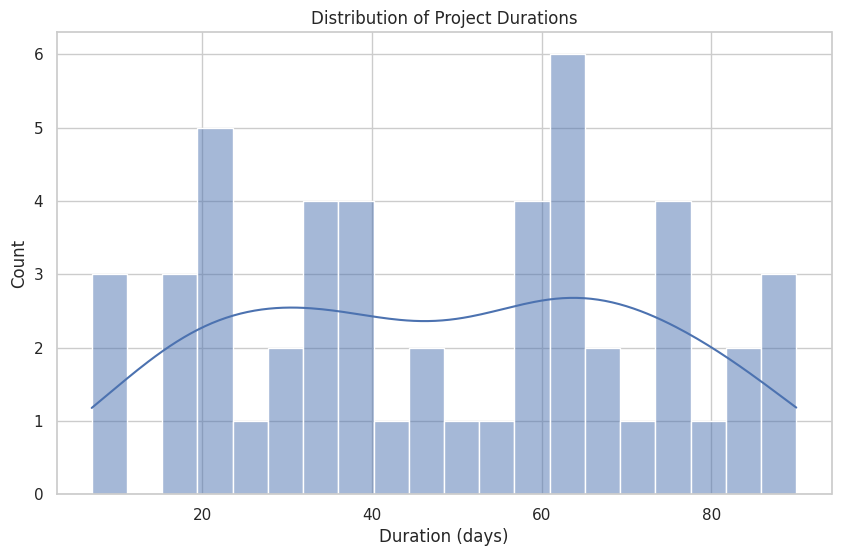

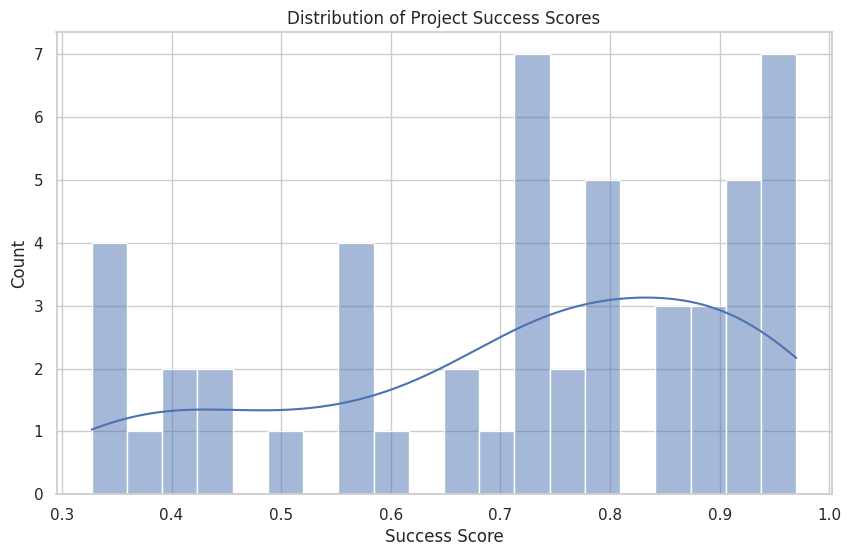

In [7]:
# Convert date columns to datetime
for date_col in ['start_date', 'end_date']:
    if date_col in projects.columns:
        projects[date_col] = pd.to_datetime(projects[date_col])

# Calculate project duration
projects['duration_days'] = (projects['end_date'] - projects['start_date']).dt.days

# Plot project duration distribution
plt.figure(figsize=(10, 6))
sns.histplot(projects['duration_days'], bins=20, kde=True)
plt.title('Distribution of Project Durations')
plt.xlabel('Duration (days)')
plt.ylabel('Count')
plt.show()

# Plot project success score distribution
plt.figure(figsize=(10, 6))
sns.histplot(projects['success_score'], bins=20, kde=True)
plt.title('Distribution of Project Success Scores')
plt.xlabel('Success Score')
plt.ylabel('Count')
plt.show()

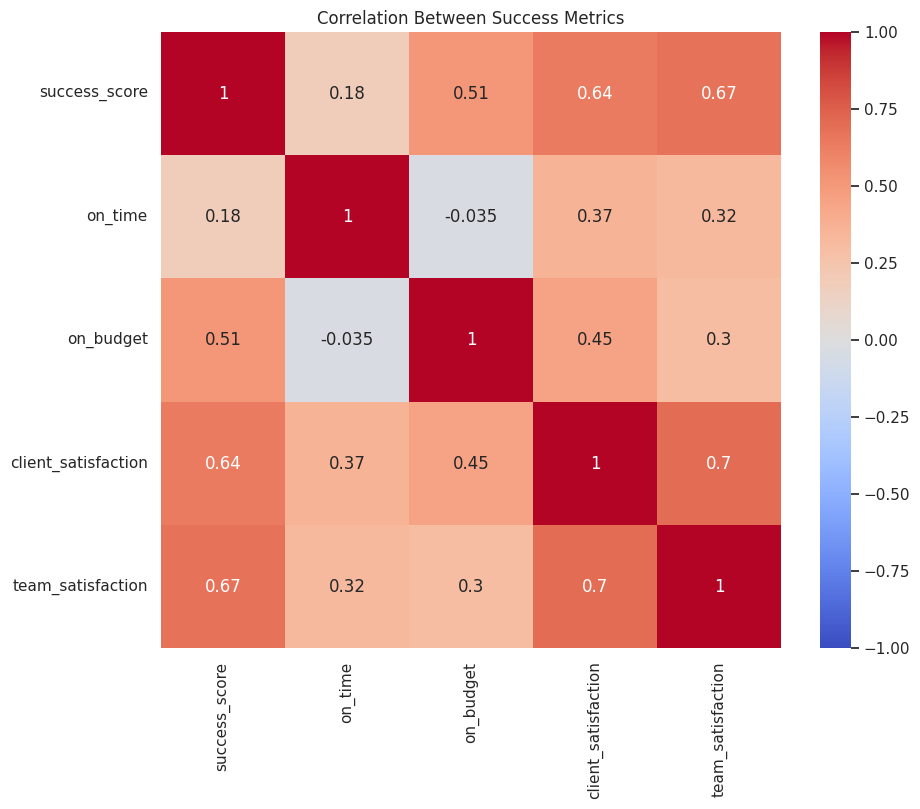

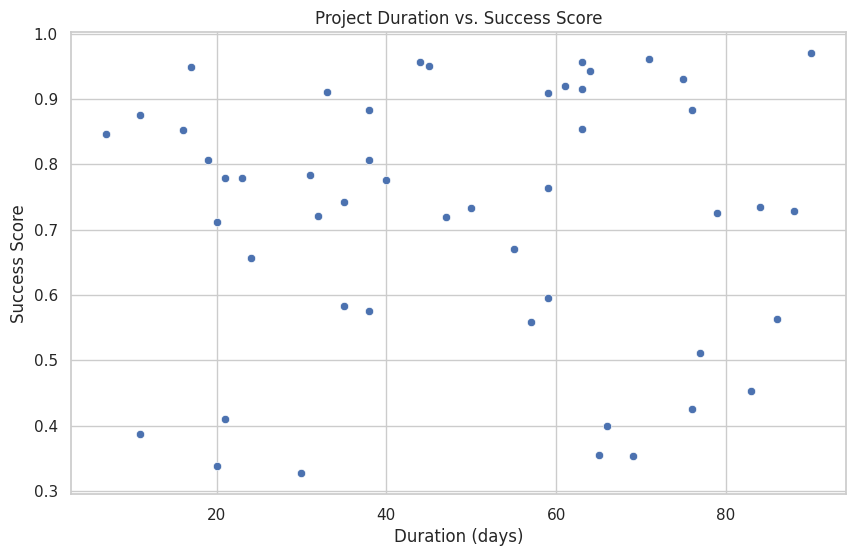

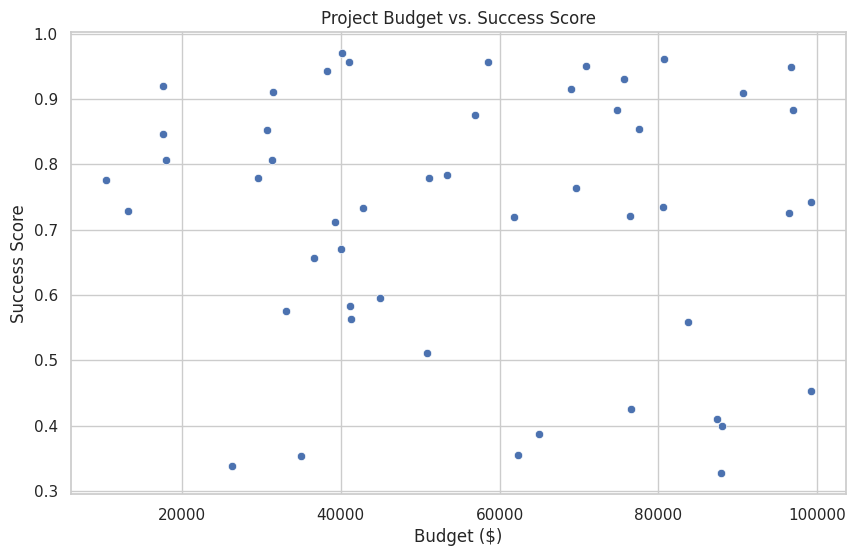

In [8]:
# Explore success factors
# Correlation between success metrics
success_metrics = ['success_score', 'on_time', 'on_budget', 'client_satisfaction', 'team_satisfaction']
success_corr = projects[success_metrics].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(success_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Success Metrics')
plt.show()

# Relationship between project duration and success
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_days', y='success_score', data=projects)
plt.title('Project Duration vs. Success Score')
plt.xlabel('Duration (days)')
plt.ylabel('Success Score')
plt.show()

# Relationship between budget and success
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='success_score', data=projects)
plt.title('Project Budget vs. Success Score')
plt.xlabel('Budget ($)')
plt.ylabel('Success Score')
plt.show()

## Exploring Resources Data

Now let's examine the resources dataset to understand team member characteristics.

In [9]:
# Basic statistics for resources
resources = raw_data['resources']
resources.describe(include='all')

,id,name,email,role,department,experience_level,hourly_rate,capacity,join_date
count,30,30,30,30,30,30,30.000000,30.0,30
unique,30,30,30,5,5,3,NaN,NaN,30
top,r1,Resource 1,resource1@example.com,QA Engineer,QA,Mid,NaN,NaN,2021-09-24
freq,1,1,1,10,10,13,NaN,NaN,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,81.700000,40.0,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,20.635005,0.0,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,49.000000,40.0,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,67.500000,40.0,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,81.000000,40.0,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,95.750000,40.0,NaN


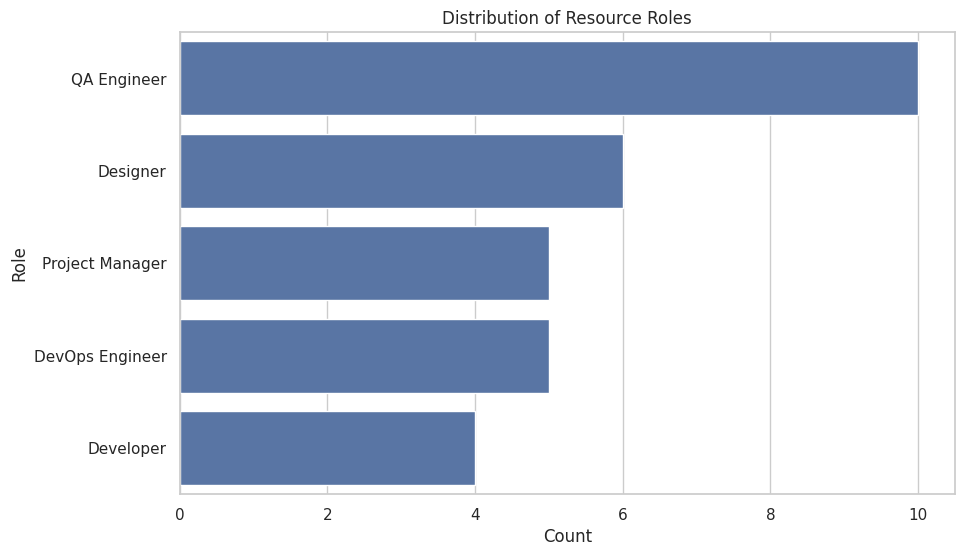

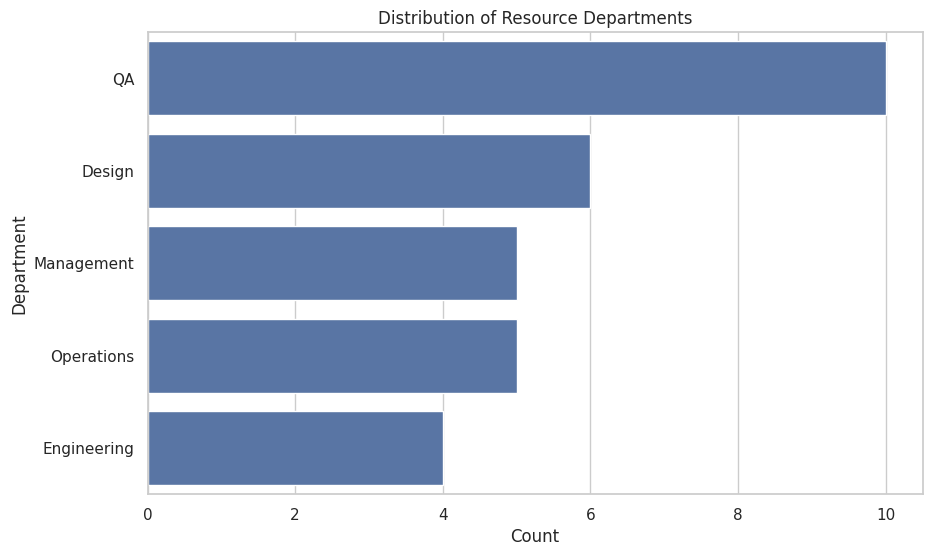

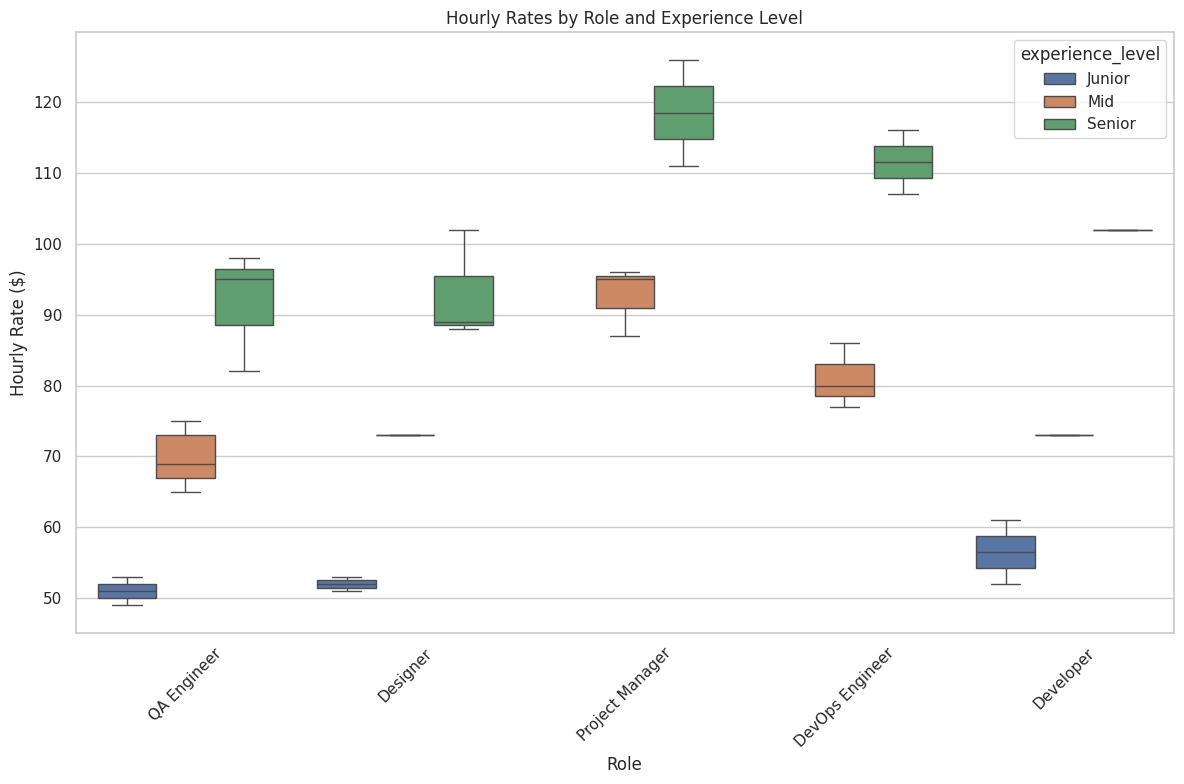

In [10]:
# Explore resource roles
plt.figure(figsize=(10, 6))
role_counts = resources['role'].value_counts()
sns.barplot(x=role_counts.values, y=role_counts.index)
plt.title('Distribution of Resource Roles')
plt.xlabel('Count')
plt.ylabel('Role')
plt.show()

# Explore resource departments
plt.figure(figsize=(10, 6))
dept_counts = resources['department'].value_counts()
sns.barplot(x=dept_counts.values, y=dept_counts.index)
plt.title('Distribution of Resource Departments')
plt.xlabel('Count')
plt.ylabel('Department')
plt.show()

# Hourly rates by role and experience level
plt.figure(figsize=(12, 8))
sns.boxplot(x='role', y='hourly_rate', hue='experience_level', data=resources, 
            order=role_counts.index, hue_order=['Junior', 'Mid', 'Senior'])
plt.title('Hourly Rates by Role and Experience Level')
plt.xlabel('Role')
plt.ylabel('Hourly Rate ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Exploring Skills Data

Let's explore the skills dataset to understand skill distribution across resources.

In [11]:
# Basic statistics for skills
resource_skills = raw_data['resource_skills']
resource_skills.describe(include='all')

,resource_id,skill_name,proficiency_level
count,175,175,175.000000
unique,30,15,NaN
top,r26,Database,NaN
freq,10,16,NaN
mean,NaN,NaN,3.445714
std,NaN,NaN,1.042858
min,NaN,NaN,1.000000
25%,NaN,NaN,3.000000
50%,NaN,NaN,3.000000
75%,NaN,NaN,4.000000


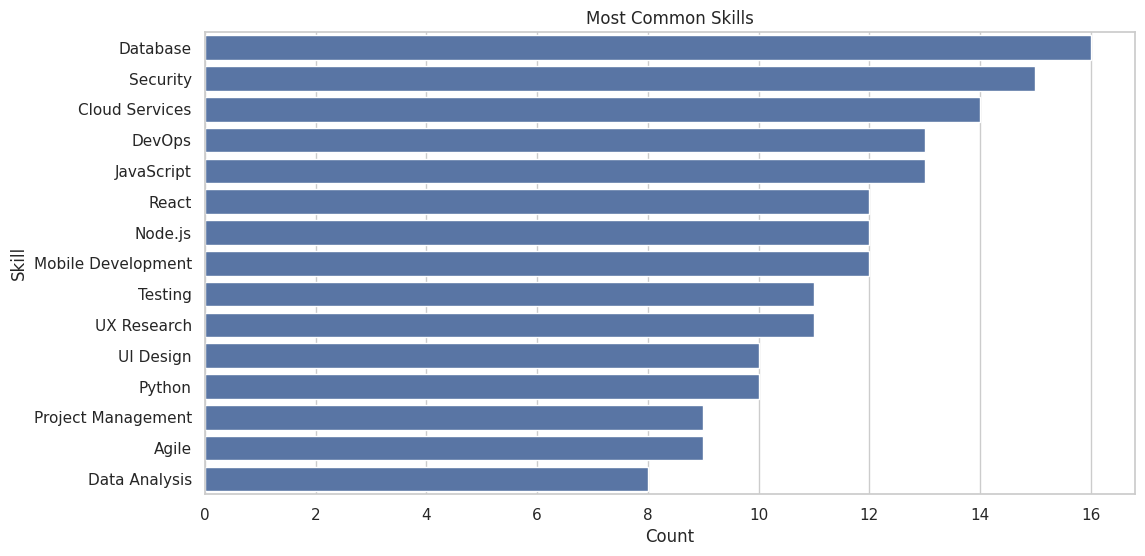

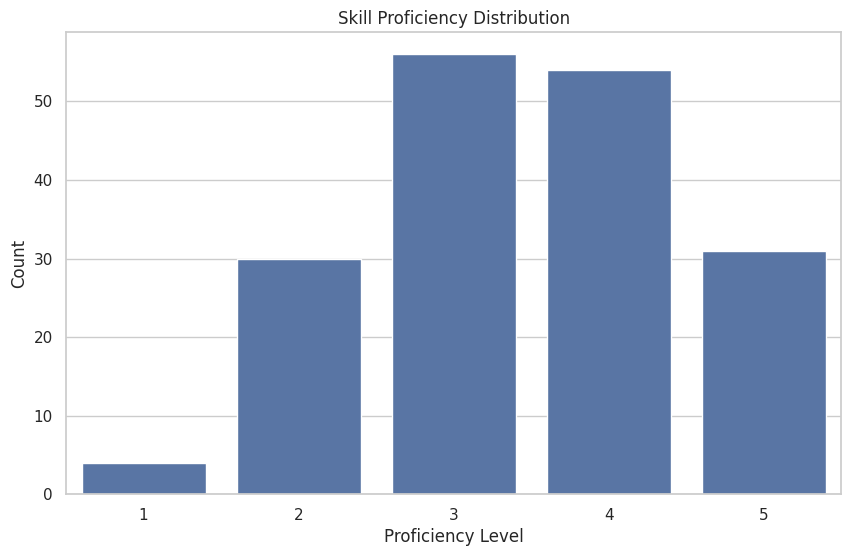

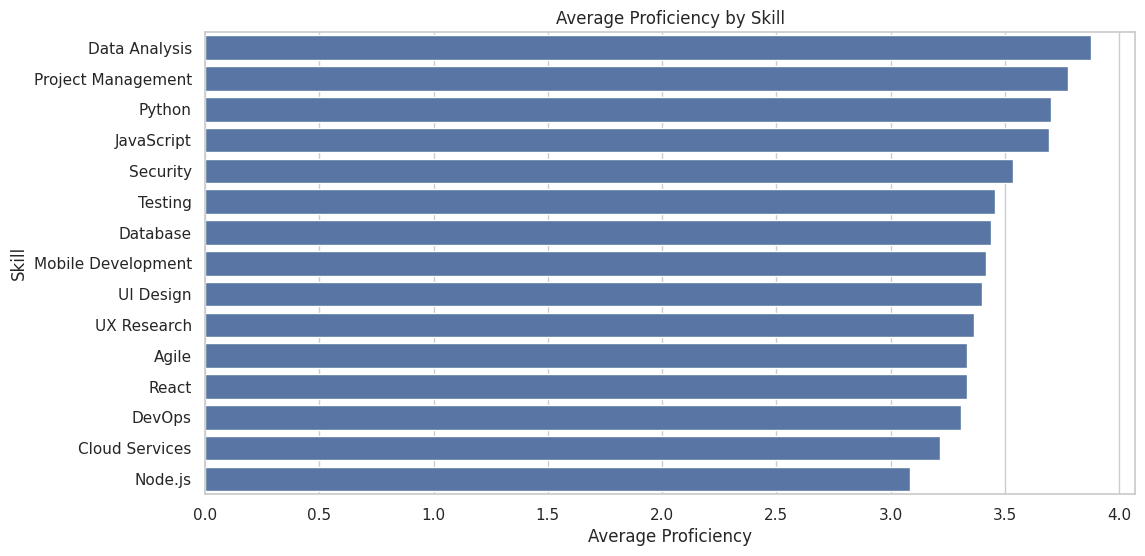

In [12]:
# Most common skills
plt.figure(figsize=(12, 6))
skill_counts = resource_skills['skill_name'].value_counts()
sns.barplot(x=skill_counts.values, y=skill_counts.index)
plt.title('Most Common Skills')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.show()

# Skill proficiency distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='proficiency_level', data=resource_skills)
plt.title('Skill Proficiency Distribution')
plt.xlabel('Proficiency Level')
plt.ylabel('Count')
plt.show()

# Average proficiency by skill
avg_proficiency = resource_skills.groupby('skill_name')['proficiency_level'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_proficiency.values, y=avg_proficiency.index)
plt.title('Average Proficiency by Skill')
plt.xlabel('Average Proficiency')
plt.ylabel('Skill')
plt.show()

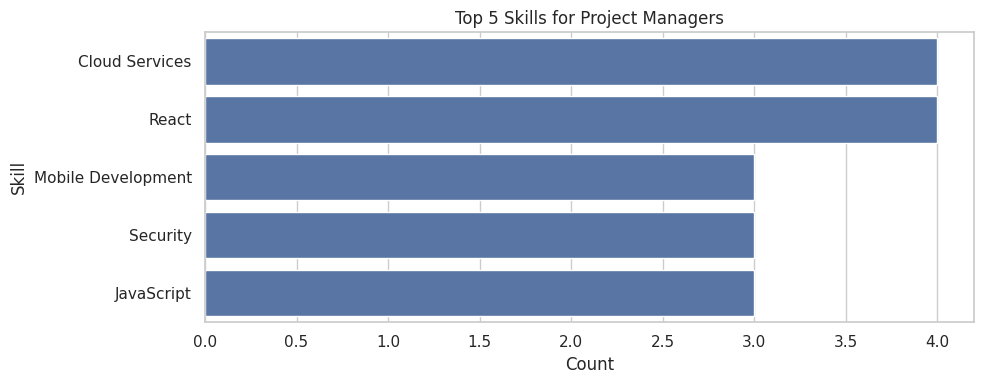

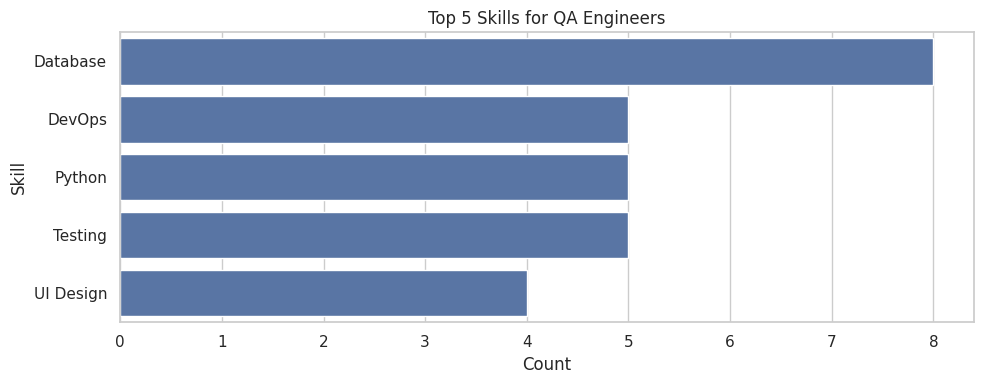

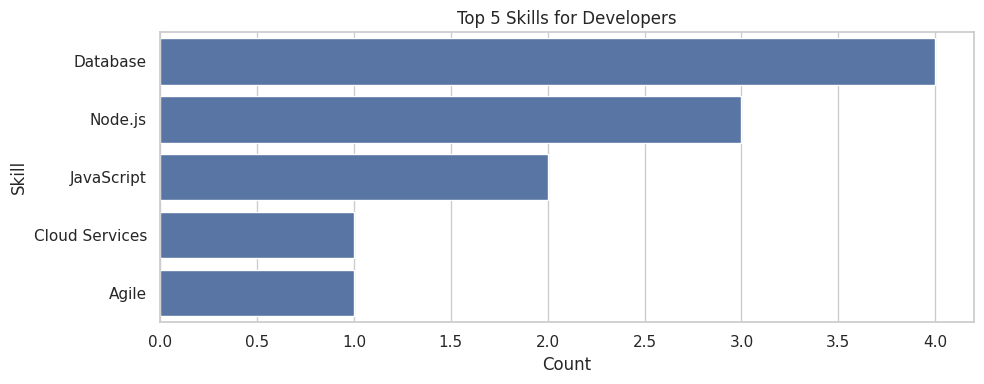

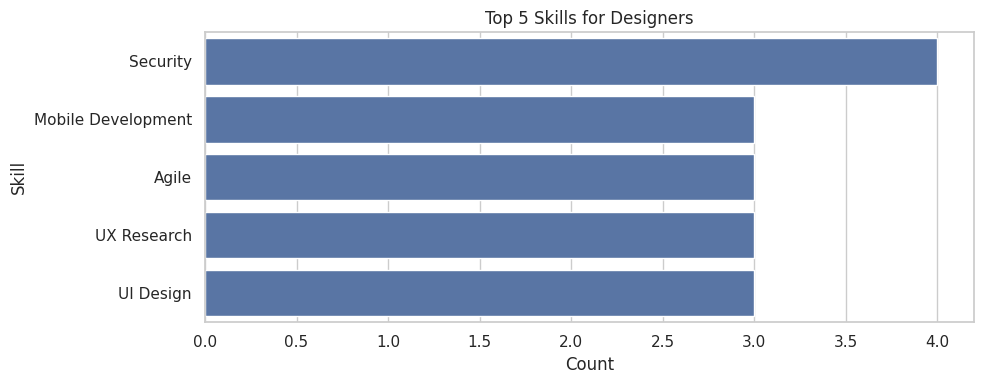

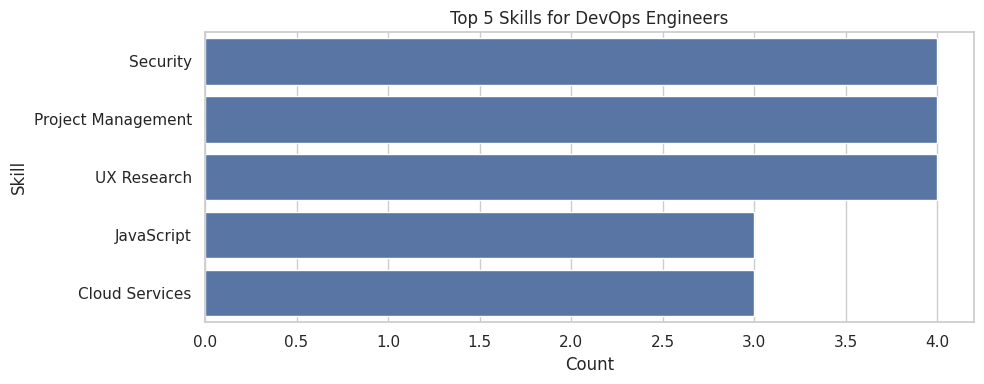

In [13]:
# Skills by role - join resource skills with resources
resources_with_skills = resource_skills.merge(resources[['id', 'role']], left_on='resource_id', right_on='id')

# Count skills by role
role_skill_counts = resources_with_skills.groupby(['role', 'skill_name']).size().reset_index(name='count')

# Top skills by role
for role in resources['role'].unique():
    role_skills = role_skill_counts[role_skill_counts['role'] == role].sort_values('count', ascending=False).head(5)
    
    plt.figure(figsize=(10, 4))
    sns.barplot(x='count', y='skill_name', data=role_skills)
    plt.title(f'Top 5 Skills for {role}s')
    plt.xlabel('Count')
    plt.ylabel('Skill')
    plt.tight_layout()
    plt.show()

## Exploring Allocations Data

Let's explore the allocations dataset to understand team compositions and project staffing.

In [14]:
# Basic statistics for allocations
allocations = raw_data['allocations']
allocations.describe(include='all')

,id,project_id,resource_id,start_date,end_date,hours_per_day,role
count,265,265,265,265,265,265.000000,265
unique,265,50,30,49,47,NaN,5
top,a265,p16,r10,2023-03-09,2023-05-31,NaN,QA Engineer
freq,1,9,16,15,16,NaN,94
mean,NaN,NaN,NaN,NaN,NaN,6.030189,NaN
std,NaN,NaN,NaN,NaN,NaN,1.641967,NaN
min,NaN,NaN,NaN,NaN,NaN,4.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,4.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,6.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,8.000000,NaN


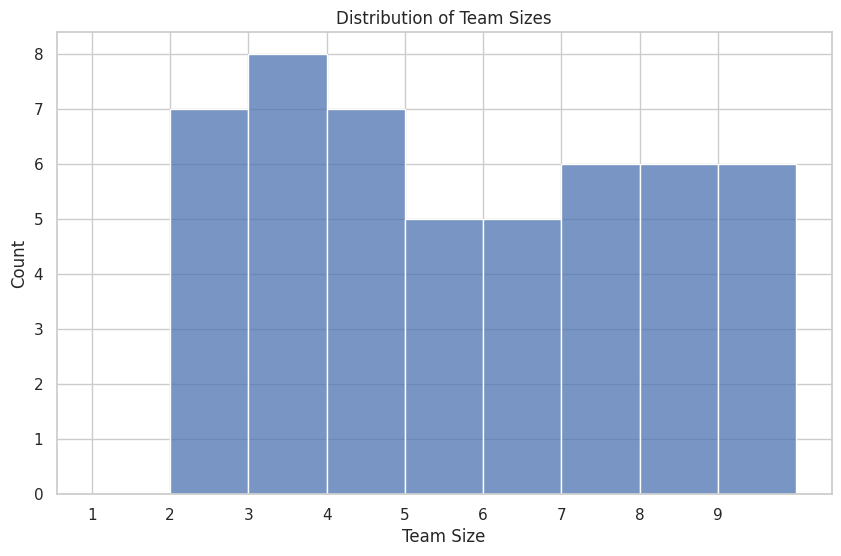

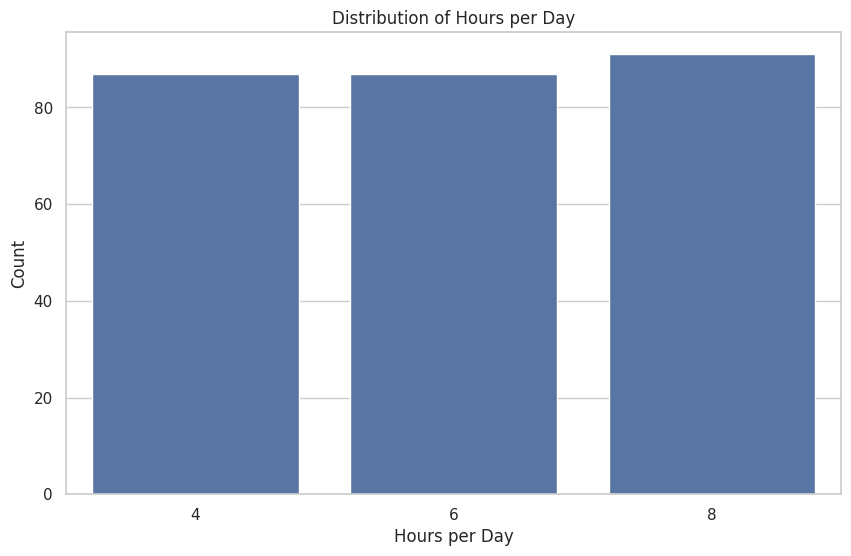

In [15]:
# Convert date columns to datetime
for date_col in ['start_date', 'end_date']:
    if date_col in allocations.columns:
        allocations[date_col] = pd.to_datetime(allocations[date_col])

# Team size distribution
team_sizes = allocations.groupby('project_id')['resource_id'].nunique()
plt.figure(figsize=(10, 6))
sns.histplot(team_sizes, bins=range(1, max(team_sizes)+2), kde=False)
plt.title('Distribution of Team Sizes')
plt.xlabel('Team Size')
plt.ylabel('Count')
plt.xticks(range(1, max(team_sizes)+1))
plt.show()

# Hours per day distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='hours_per_day', data=allocations)
plt.title('Distribution of Hours per Day')
plt.xlabel('Hours per Day')
plt.ylabel('Count')
plt.show()

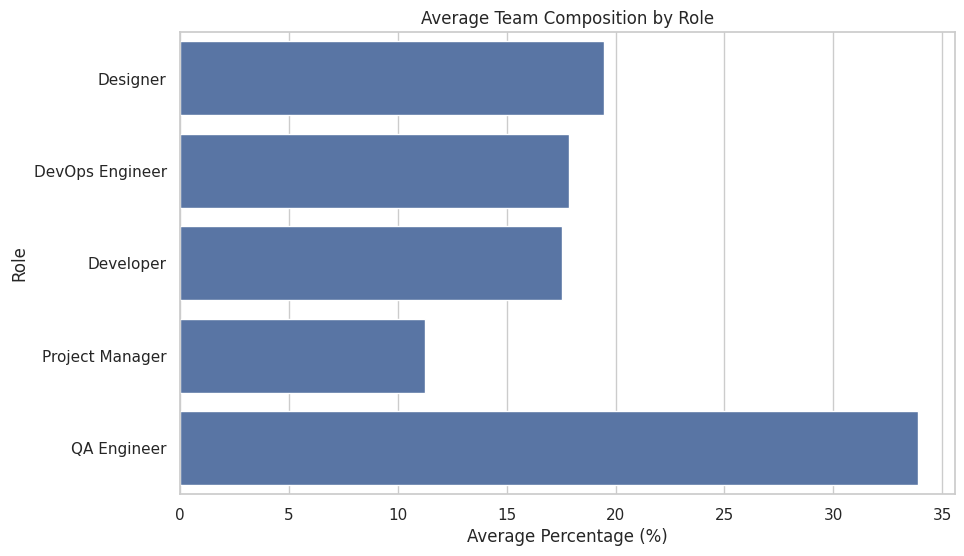

In [24]:
# Merge allocations with resources to include role information
allocations_with_roles = allocations.merge(resources[['id', 'role']], left_on='resource_id', right_on='id')

allocations_with_roles = allocations_with_roles.rename(columns={'role_y': 'role'}).drop(columns=['role_x'])

# Group by project_id and role, count the occurrences of each role
team_roles = allocations_with_roles.groupby('project_id')['role'].value_counts().unstack().fillna(0)

# Convert counts to percentages
team_role_pcts = team_roles.div(team_roles.sum(axis=1), axis=0) * 100

# Calculate average role composition across all projects
avg_role_pcts = team_role_pcts.mean()

# Plot the average role composition
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_role_pcts.values, y=avg_role_pcts.index)
plt.title('Average Team Composition by Role')
plt.xlabel('Average Percentage (%)')
plt.ylabel('Role')
plt.show()



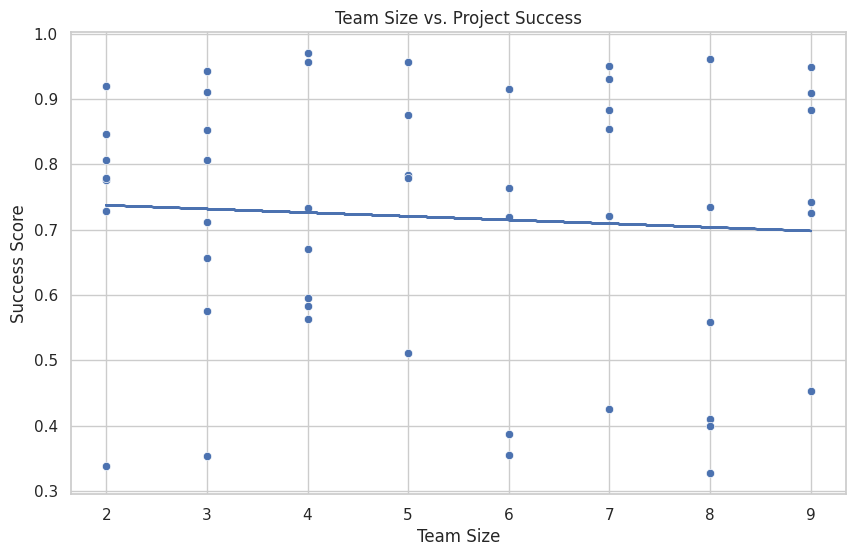

In [25]:
# Join allocations with projects to analyze relationship with success
allocations_with_success = allocations.merge(projects[['id', 'success_score']],
        left_on='project_id',
        right_on='id',
        suffixes=('', '_project'))


# Team size vs success score

team_size_success = allocations_with_success.groupby('project_id').agg(
        team_size=('resource_id', 'nunique'),
        success_score=('success_score', 'first')
    )

plt.figure(figsize=(10, 6))
sns.scatterplot(x='team_size', y='success_score', data=team_size_success)
plt.title('Team Size vs. Project Success')
plt.xlabel('Team Size')
plt.ylabel('Success Score')

# Add trend line
z = np.polyfit(team_size_success['team_size'], team_size_success['success_score'], 1)
p = np.poly1d(z)
plt.plot(team_size_success['team_size'], p(team_size_success['team_size']))
plt.show()

#### Analyze Skill Diversity in Teams and Relationship with Success

This section analyzes the skill diversity within teams and its relationship with project success.


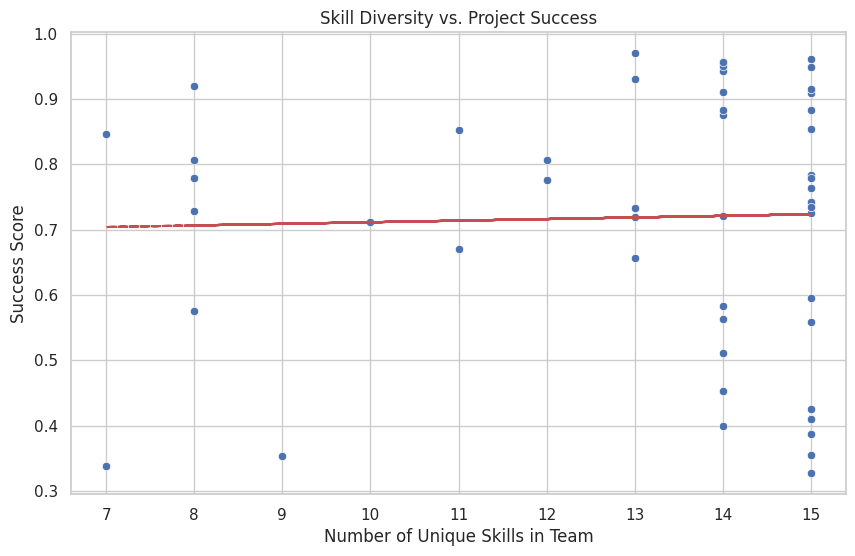

In [27]:
# First, get skills for each team member
team_members_skills = allocations.merge(
    resource_skills,
    left_on='resource_id',
    right_on='resource_id'
)

# Calculate unique skills per project
project_skill_counts = team_members_skills.groupby('project_id')['skill_name'].nunique().reset_index()
project_skill_counts.columns = ['project_id', 'unique_skills']

# Join with project success
skill_diversity_success = project_skill_counts.merge(
    projects[['id', 'success_score']],
    left_on='project_id',
    right_on='id'
)

# Plot relationship between skill diversity and success
plt.figure(figsize=(10, 6))
sns.scatterplot(x='unique_skills', y='success_score', data=skill_diversity_success)
plt.title('Skill Diversity vs. Project Success')
plt.xlabel('Number of Unique Skills in Team')
plt.ylabel('Success Score')

# Add trend line
z = np.polyfit(skill_diversity_success['unique_skills'], skill_diversity_success['success_score'], 1)
p = np.poly1d(z)
plt.plot(skill_diversity_success['unique_skills'], p(skill_diversity_success['unique_skills']), "r--")
plt.show()

#### Exploring Feedback Data

Let's examine the feedback data to understand resource performance and feedback patterns.

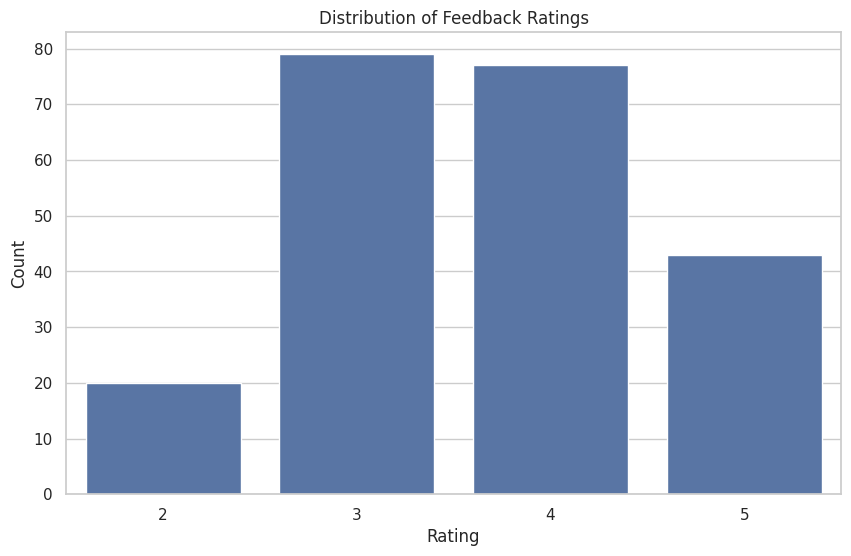

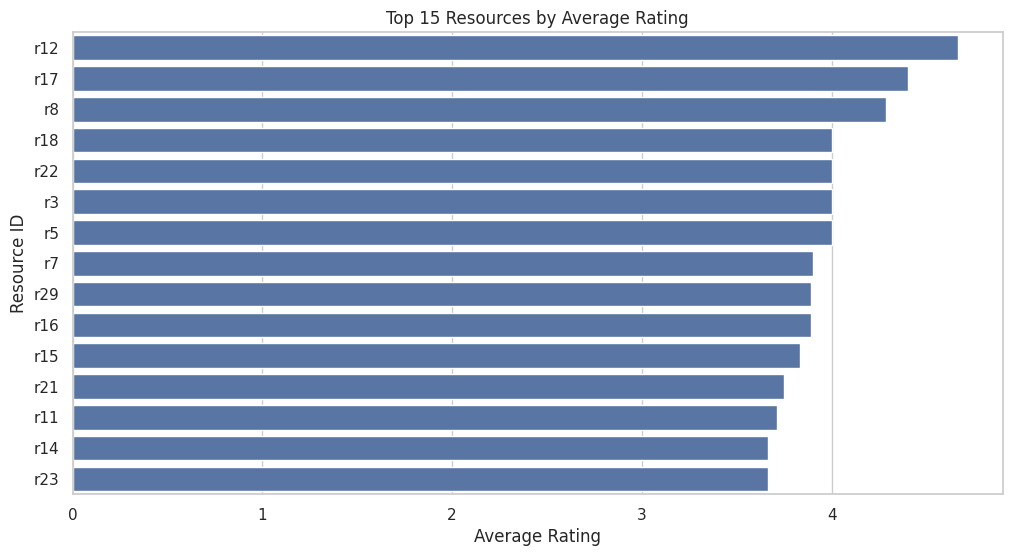

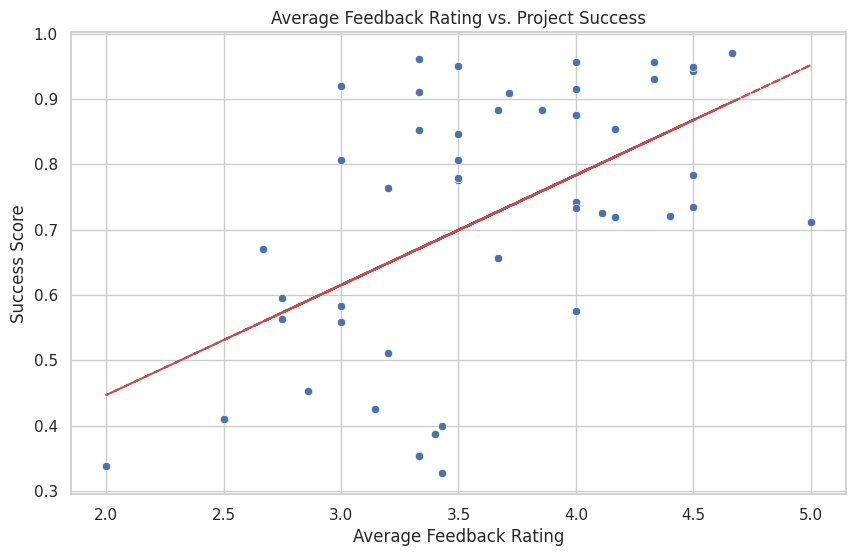

In [28]:
feedback = raw_data.get('feedback', pd.DataFrame())
if not feedback.empty:
    feedback.describe(include='all')
else:
    print("No feedback data available.")


if not feedback.empty:
    # Rating distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(x='rating', data=feedback)
    plt.title('Distribution of Feedback Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.show()

    # Average rating by resource
    resource_ratings = feedback.groupby('resource_id')['rating'].agg(['mean', 'count']).reset_index()
    resource_ratings = resource_ratings.sort_values('mean', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='mean', y='resource_id', data=resource_ratings.head(15))
    plt.title('Top 15 Resources by Average Rating')
    plt.xlabel('Average Rating')
    plt.ylabel('Resource ID')
    plt.show()

    # Correlation between feedback and project success
    project_feedback = feedback.groupby('project_id')['rating'].mean().reset_index()
    project_feedback = project_feedback.merge(
        projects[['id', 'success_score']],
        left_on='project_id',
        right_on='id'
    )

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='rating', y='success_score', data=project_feedback)
    plt.title('Average Feedback Rating vs. Project Success')
    plt.xlabel('Average Feedback Rating')
    plt.ylabel('Success Score')

    # Add trend line
    z = np.polyfit(project_feedback['rating'], project_feedback['success_score'], 1)
    p = np.poly1d(z)
    plt.plot(project_feedback['rating'], p(project_feedback['rating']), "r--")
    plt.show()
else:
    print("No feedback data available for analysis.")

#### Feature Matrix Creation

Now, let's create the feature matrices that will be used by our recommendation models.


RESOURCE_SKILL_MATRIX - Shape: (30, 15)
skill_name   Agile  Cloud Services  Data Analysis  Database  DevOps  \
resource_id                                                           
r1             0.0             0.6            0.0       0.8     0.6   
r10            0.0             0.8            0.0       0.0     0.4   
r11            0.0             0.0            0.0       0.8     0.4   

skill_name   JavaScript  Mobile Development  Node.js  Project Management  \
resource_id                                                                
r1                  1.0                 0.0      1.0                 0.0   
r10                 0.8                 0.0      0.0                 0.8   
r11                 0.8                 0.0      0.0                 0.8   

skill_name   Python  React  Security  Testing  UI Design  UX Research  
resource_id                                                            
r1              0.0    0.8       0.0      0.8        0.0          0.0  
r10   

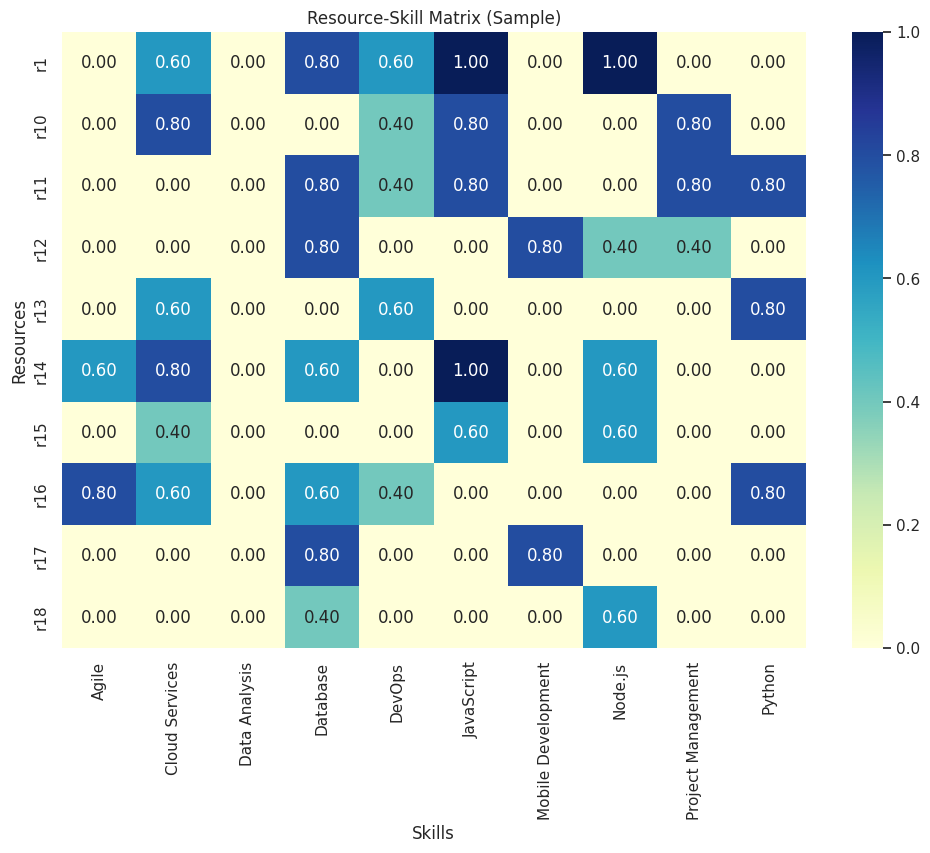

In [29]:
# Process data and create feature matrices
processed_data = processor.process_data()
feature_matrices = processor.create_feature_matrices()

# Display the feature matrices
for name, matrix in feature_matrices.items():
    print(f"\n{name.upper()} - Shape: {matrix.shape}")
    print(matrix.head(3))


   # Visualize resource-skill matrix as a heatmap (if not too large)
if 'resource_skill_matrix' in feature_matrices:
    skill_matrix = feature_matrices['resource_skill_matrix']
    
    # If matrix is large, just show a sample
    if skill_matrix.shape[0] > 20 or skill_matrix.shape[1] > 20:
        sample_resources = skill_matrix.index[:10]
        sample_skills = skill_matrix.columns[:10]
        sample_matrix = skill_matrix.loc[sample_resources, sample_skills]
        
        plt.figure(figsize=(12, 8))
        sns.heatmap(sample_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
        plt.title('Resource-Skill Matrix (Sample)')
        plt.xlabel('Skills')
        plt.ylabel('Resources')
        plt.show()
    else:
        plt.figure(figsize=(15, 10))
        sns.heatmap(skill_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
        plt.title('Resource-Skill Matrix')
        plt.xlabel('Skills')
        plt.ylabel('Resources')
        plt.show()

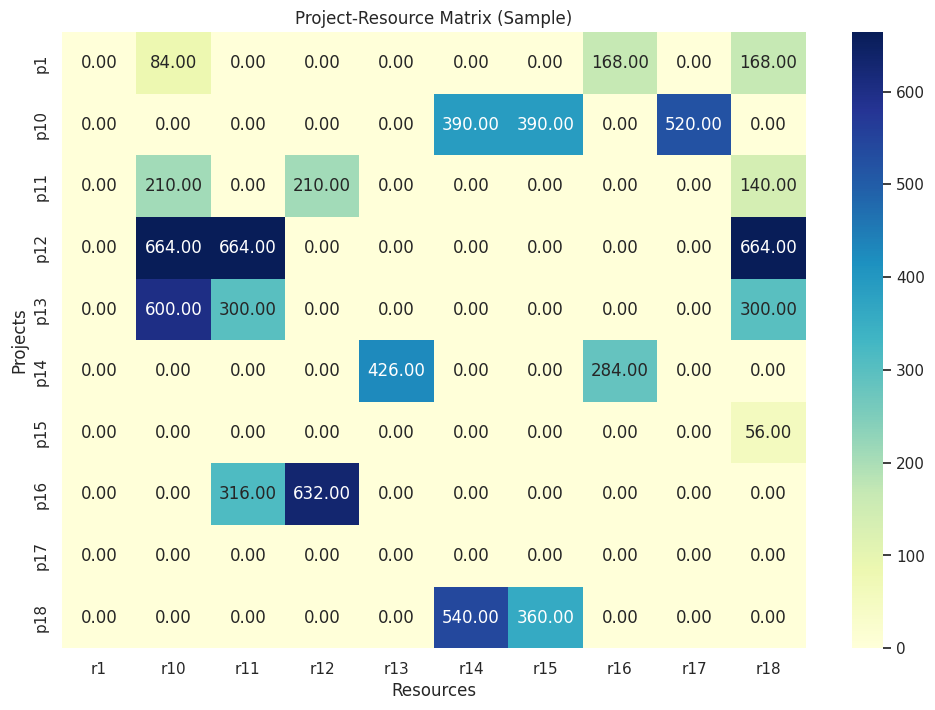

In [30]:
# Visualize project-resource matrix as a heatmap (if not too large)
if 'project_resource_matrix' in feature_matrices:
    proj_res_matrix = feature_matrices['project_resource_matrix']
    
    # If matrix is large, just show a sample
    if proj_res_matrix.shape[0] > 20 or proj_res_matrix.shape[1] > 20:
        sample_projects = proj_res_matrix.index[:10]
        sample_resources = proj_res_matrix.columns[:10]
        sample_matrix = proj_res_matrix.loc[sample_projects, sample_resources]
        
        plt.figure(figsize=(12, 8))
        sns.heatmap(sample_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
        plt.title('Project-Resource Matrix (Sample)')
        plt.xlabel('Resources')
        plt.ylabel('Projects')
        plt.show()
    else:
        plt.figure(figsize=(15, 10))
        sns.heatmap(proj_res_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
        plt.title('Project-Resource Matrix')
        plt.xlabel('Resources')
        plt.ylabel('Projects')
        plt.show()

## Key Findings and Insights

Based on our exploration of the data, here are some key findings that will inform our recommendation engine design:

1. **Project Success Factors**:
   - There's a strong correlation between project success and both client and team satisfaction.
   - On-time delivery and budget adherence also correlate with success.
   - Project duration and size appear to influence success, with medium-sized projects often performing better.

2. **Team Composition Patterns**:
   - Team size has a relationship with project success, with an optimal range appearing around 4-6 members.
   - Teams with higher skill diversity tend to have higher success rates.
   - A balanced mix of roles appears to be more effective than teams dominated by a single role.

3. **Resource Characteristics**:
   - Resources with higher average ratings tend to contribute more to project success.
   - Experience level correlates with both skill proficiency and project success.
   - Different roles require different skill sets, which should be considered in recommendations.

4. **Skill Patterns**:
   - Some skills are more prevalent across teams and may be considered "core skills."
   - Certain skills show stronger correlation with project success.
   - The combination of skills in a team appears more important than individual skill levels.

These insights will guide our recommendation model design, helping us prioritize factors that contribute to successful project outcomes.